In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull

In [209]:
npts = 1000

# points = np.transpose((np.random.rand(npts), np.random.rand(npts), np.arange(npts)))
# print(rpoints)
xpts = np.linspace(.02, .97, npts)
ypts = - 100 * np.random.rand(npts)
confs = np.arange(npts)

# points = np.concatenate((np.transpose([xpts,ypts,confs]), np.array([[0,0,npts],[1,0, npts + 1]])))
# print(np.transpose(_points).shape, np.arange(npts).shape)
points = np.concatenate((np.transpose([xpts, ypts]), np.array([[0,0],[1,0]])))
print(points.shape)

hull = ConvexHull(points)

(1002, 2)


[[ 0.00000000e+00  0.00000000e+00]
 [ 2.76076076e-02 -9.71893925e+01]
 [ 7.42042042e-02 -9.94449289e+01]
 [ 4.24154154e-01 -9.99830292e+01]
 [ 8.73953954e-01 -9.98622759e+01]
 [ 9.70000000e-01 -9.82765350e+01]
 [ 1.00000000e+00  0.00000000e+00]]


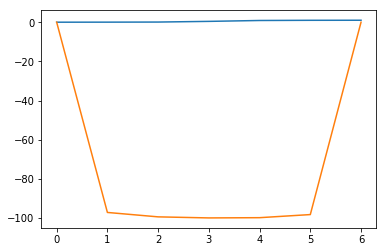

In [210]:
class PiecewiseCHull:
    def __init__(self, chull):
        pts = hull.points[hull.vertices]
        vals = zip(*np.transpose(*[pts]))
        self.vertex_points = np.asarray(sorted(vals, key=lambda x: x[0]))
        print(self.vertex_points)
        self.set_piecewise()
#         for elems in self.piecewise:
#             print(elems)
#         for pt in self.vertex_points:
#             plt.scatter(*pt)
            
            
    def set_piecewise(self):
        
        self.piecewise = []
        piecewise = []
        
        for i in range(1, len(self.vertex_points)):
            x2 = self.vertex_points[i][0]
            y2 = self.vertex_points[i][1]
            x1 = self.vertex_points[i-1][0]
            y1 = self.vertex_points[i-1][1]
            
            m = ((y2- y1) / (x2- x1))
            
            linear_variables = np.array([m, x2, y2, x1, y1])
            piecewise.append(linear_variables)
        self.piecewise = np.around(piecewise, decimals=7)
            
#      
#     def get_hull_energy(self, struct):
#         """ Calculate the position of the convex hull at a point x """
#         energies = []
#         composition, energy, conf_id = struct

# #         composition = np.asarray(composition)
        
# #         for params in self.piecewise:
# #             m, x2, y2, x1, y1 = params
# #             domain = [x1, x2]
# #             energies.append([m * (x - x1) + y1 for x in composition if x >= x1 and x <= x2])
        
#         hull_energies = np.asarray([m * (x - x1) + y1 for m, x2, y2, x1, y1 in self.piecewise
#                                                  for x in composition if x >= x1 and x <= x2])
        
        # Flatten the arrays
#         print(energies.shape)
#         hull_energy = [item for sublist in energies for item in sublist]
#         hull_energy = energies
#         print(energies.shape)
#         hull_energies = np.transpose([composition, hull_energy])
#         return hull_energies

    
    def get_distance_from_hull(self, struct):
        
        
        if struct.shape[0] > struct.shape[1]:
            struct = np.transpose(struct)
#         print(struct.shape)
        composition, struct_energy = struct #, conf_id
#         print(composition)

#         Calculate the structures' energy distance from the convex hull
        checker = False
#         hull_energy = [m * (concB - x1) + y1 if x1 <= concB <= x2 else print('hi')
#                            for concB in composition
#                         if concB == 1
#                        for m, x2, y2, x1, y1 in self.piecewise

#                            if concB == 1 
#                       ]
#         hull_energy = [m * (concB - x1) + y1 if x1 <= concB < x2 
#                            for concB in composition
#                         if concB == 1
#                        for m, x2, y2, x1, y1 in self.piecewise

#                            if concB == 1 
#                       ]
#         print(hull_energy)
        hull_energy = []
        for i in range(len(composition)):

            for m, x2, y2, x1, y1 in self.piecewise:
                conc = composition[i]
                energy = m * (conc - x1) + y1

                if x1 <= conc < x2:
                    hull_energy.append(energy)
#                     if x1 == 0:
#                         print('======= ZERO =======')
#                     print(i)
                elif conc == 1:
#                     print(i, conc)
                    hull_energy.append(energy)
                    break
                    
                    
#         print(len(hull_energy))
#         return
    
#         print(hull_energy.shape, energy.shape)
        ediff = hull_energy - struct_energy
        comp_dist = np.transpose([composition, ediff])

        return comp_dist
    
    
    def get_4sigma(self, comp_dist, sigma=10):
        sigma_4 = 4 * sigma
        
        near_hull = [[composition, ediff, conf_id] for composition, ediff, conf_id
                                     in comp_dist if ediff < sigma_4]
        
        return near_hull
    

        
hull_test = PiecewiseCHull(hull)

struct_distance = hull_test.get_distance_from_hull(points)

# print(hull_test.vertex_points)
# print(struct_distance)
# plt.plot(np.transpose(hull_test.vertex_points[0:2]))
# plt.plot(hull.points[hull_test, 0], hull.points[hull_test.vertex_points, 1], 'r-')
plt.plot(hull_test.vertex_points)
# plt.plot(hull.points[:,0], hull.points[:,1], 'b.')

plt.show()